In [119]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import netCDF4
from scipy.ndimage import rotate

In [120]:
ir_path = "E:/test/alignment/ir/"
nc_path = "E:/polar/code/data/flight9/IRdata_ATWAICE_processed_220718_142920.nc"

In [121]:
ds = netCDF4.Dataset(nc_path)
ds_size = len(ds.dimensions['t'])

imgs = ds.variables['Ts'][:]

xd = ds.variables['xd'][:]
yd = ds.variables['yd'][:]

timestamps = ds.variables['time'][:]

In [122]:
imgs = ds.variables['Ts'][:]

In [26]:
for i in os.listdir(ir_path):
    f = os.path.join(ir_path, i)
    print(f)
    im = cv2.imread(f,0)

E:/test/alignment/ir/20220718_151558_308.png
E:/test/alignment/ir/20220718_151614_310.png
E:/test/alignment/ir/20220718_151846_329.png
E:/test/alignment/ir/20220718_152014_340.png


Corners: [(-5155.6636, 37204.36), (-5155.6636, 37612.227), (-4801.203, 37204.36), (-4801.203, 37612.227)]
Corners: [(-4488.6167, 37102.56), (-4488.6167, 37548.152), (-4098.731, 37102.56), (-4098.731, 37548.152)]
Corners: [(1648.5619, 36277.137), (1648.5619, 36798.35), (2099.376, 36277.137), (2099.376, 36798.35)]
Corners: [(2277.8438, 33413.727), (2277.8438, 33844.03), (2800.7024, 33413.727), (2800.7024, 33844.03)]


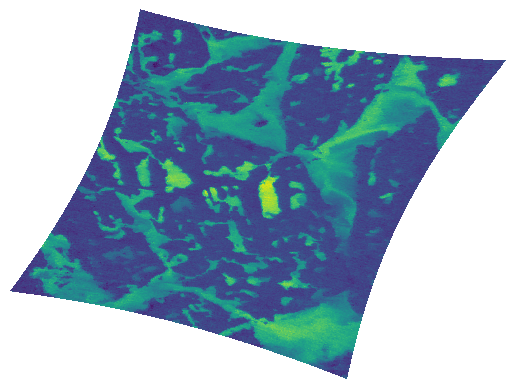

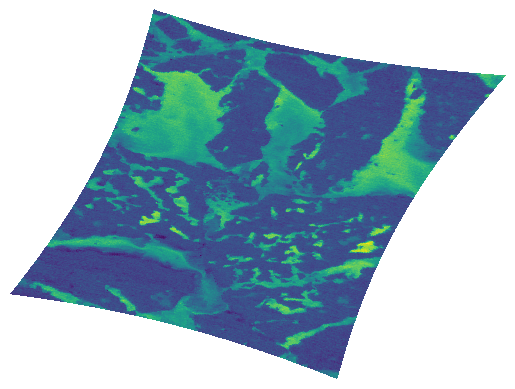

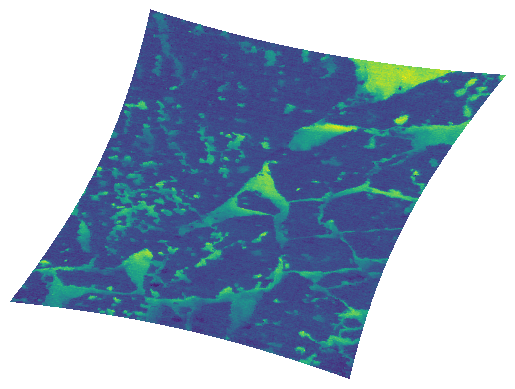

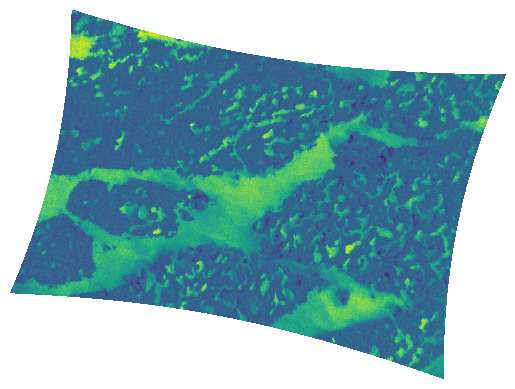

In [123]:
tests = [2464,2480,2632,2720]
test = [2464]

for i in tests:
    fig, ax = plt.subplots()
    ax.pcolormesh(xd[i], yd[i], imgs[i])
    ax.axis('off')
    # Finding corners
    x_min, x_max = np.min(xd[i]), np.max(xd[i])
    y_min, y_max = np.min(yd[i]), np.max(yd[i])

    corners = [(x_min, y_min), (x_min, y_max), (x_max, y_min), (x_max, y_max)]
    print("Corners:", corners)
    plt.savefig("E:/test/alignment/ir_undistorted/{}".format(i))

In [124]:
#Get bounding boxes from mask.
def get_bounding_box(ground_truth_map):
  # get bounding box from mask
  y_indices, x_indices = np.where(ground_truth_map > 100)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)
  bbox = [x_min, y_min, x_max, y_max]

  return bbox

Slope: -0.466307669878006
Slope: -0.466307669878006
Slope: 1.80404794216156
Slope: 0.7535542249679565
Slope: -0.7535539865493774
Slope: -0.445228636264801
Slope: -0.7535539865493774
Slope: 0.7535542249679565
Slope: 2.0503039360046387
Slope: 1.8807263374328613
Slope: 1.8807263374328613
Slope: -0.466307669878006
Slope: 0.7535542249679565
Slope: -0.7535539865493774
Slope: 1.0
Slope: 1.0
Slope: -0.445228636264801
Slope: -0.7535539865493774
Slope: 0.7535542249679565


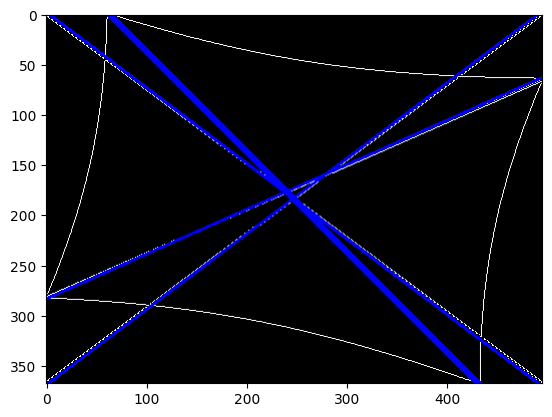

In [125]:
undist_dir = "E:/test/alignment/ir_undistorted/"

for idx, file in enumerate(os.listdir(undist_dir)):
    
    # data read-in and conversion
    im = cv2.imread(os.path.join(undist_dir, file), 0)
    im[im==255] = 0
    im[im!=0] = 255
    im[im==0] = 100

    # crop to image size
    bb_full = get_bounding_box(im)
    # start_row:end_row, start_col:end_col
    crop = im[bb_full[1]:bb_full[3], bb_full[0]:bb_full[2]]

    bb_crop = get_bounding_box(crop)

    # get the corner points
    pix_up = np.where(crop[0] > 100)
    pix_do = np.where(crop[bb_crop[3]] > 100)

    start_up = np.mean(pix_up)
    start_do = np.mean(pix_do)

    pix_lef = np.where(crop[:,0] > 100)
    pix_rig = np.where(crop[:,bb_crop[2]] > 100)

    start_lef = np.mean(pix_lef)
    start_rig = np.mean(pix_rig)

    # Draw a line on the image
    start_point = (int(start_up),0)  # Define the start point of the line
    end_point = (int(start_do),bb_crop[3])  # Define the end point of the line
    color = (0, 0, 0)
    thickness = 1  # Define the thickness of the line

    image_with_line = cv2.line(crop, start_point, end_point, color, thickness)

    # Draw a line on the image
    start_point = (0,int(start_lef))  # Define the start point of the line
    end_point = (bb_crop[2],int(start_rig))  # Define the end point of the line
    color = (0, 0, 0)
    thickness = 1  # Define the thickness of the line

    image_with_line = cv2.line(crop, start_point, end_point, color, thickness)

    plt.imshow(image_with_line)
    cv2.imwrite("E:/test/alignment/lines_image/{}.png".format(idx), image_with_line)

    ############################################################################

    start_point = (0,0)
    end_point = (bb_crop[2],bb_crop[3])
    color = (0, 0, 0)
    thickness = 1

    image_with_line = cv2.line(crop, start_point, end_point, color, thickness)

    start_point = (0,bb_crop[3])
    end_point = (bb_crop[2],0)
    color = (0, 0, 0)
    thickness = 1

    image_with_line = cv2.line(crop, start_point, end_point, color, thickness)

    plt.imshow(image_with_line)
    cv2.imwrite("E:/test/alignment/lines_figure/{}.png".format(idx), image_with_line)

    ############################################################################

In [130]:
lines_path = "E:/test/alignment/lines_figure/"

for idx, file in enumerate(os.listdir(lines_path)):
    im = cv2.imread(os.path.join(lines_path, file))

    # Apply edge detection (if necessary)
    edges = cv2.Canny(im, 50, 150, apertureSize=3)

    # Apply Hough Line Transform to detect lines
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    idx = 0
    slopes = []

    # Calculate the slope of each line
    for line in lines:
        rho, theta = line[0]
        slope = -np.cos(theta) / np.sin(theta)  # Calculate the slope using the angle information
        idx = idx + 1
        slopes.append(slope)
        print(f"Slope: {slope}")

    # Display the image with the detected lines
    image_with_lines = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)  # Convert the image to color for drawing
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Draw the detected lines

    #############################################################################################
    #############################################################################################
    #############################################################################################

    # Calculate the angle between the two lines
    if slopes[0] == slopes[1]:
        angle_rad = np.arctan(abs((slopes[1] - slopes[4]) / (1 + slopes[1] * slopes[4])))
    else:
        angle_rad = np.arctan(abs((slopes[0] - slopes[3]) / (1 + slopes[0] * slopes[3])))
    angle_deg = np.degrees(angle_rad)

    print(f"Angle between the two lines: {angle_deg} degrees")

    rot = rotate(im, angle_deg)
    cv2.imwrite("E:/test/alignment/rotated_1/{}.png".format(idx), rot)

    #############################################################################################
    #############################################################################################
    #############################################################################################

    # Calculate the angle between the two lines
    if slopes[0] == slopes[1]:
        angle_rad = np.arctan(abs((slopes[2] - slopes[3]) / (1 + slopes[2] * slopes[3])))
    else:
        angle_rad = np.arctan(abs((slopes[1] - slopes[2]) / (1 + slopes[1] * slopes[2])))
    angle_deg = np.degrees(angle_rad)

    print(f"Angle between the two lines: {angle_deg} degrees")

    rot = rotate(im, angle_deg)
    cv2.imwrite("E:/test/alignment/rotated_2/{}.png".format(idx), rot)

Slope: -0.466307669878006
Slope: -0.466307669878006
Slope: 1.80404794216156
Slope: 0.7535542249679565
Slope: -0.7535539865493774
Angle between the two lines: 11.999997092942934 degrees
Angle between the two lines: 23.99999606129981 degrees
Slope: -0.445228636264801
Slope: -0.7535539865493774
Slope: 0.7535542249679565
Slope: 2.0503039360046387
Angle between the two lines: 87.9999984283089 degrees
Angle between the two lines: 74.00000422648608 degrees
Slope: 1.8807263374328613
Slope: 1.8807263374328613
Slope: -0.466307669878006
Slope: 0.7535542249679565
Slope: -0.7535539865493774
Angle between the two lines: 81.00000377573468 degrees
Angle between the two lines: 62.0000067953532 degrees
Slope: 1.0
Slope: 1.0
Slope: -0.445228636264801
Slope: -0.7535539865493774
Slope: 0.7535542249679565
Angle between the two lines: 7.999993609672377 degrees
Angle between the two lines: 12.999999996080998 degrees


[100 255]


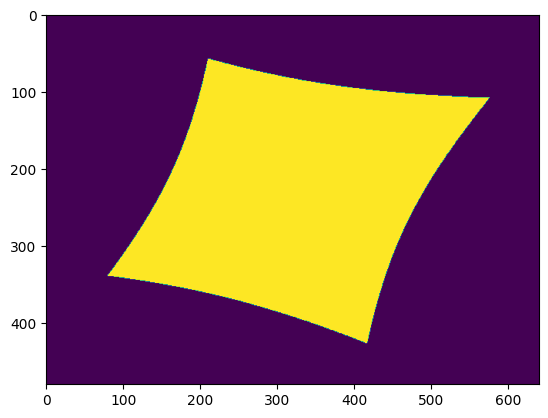

In [104]:
undist = cv2.imread("E:/test/alignment/ir_undistorted/2464.png",0)
undist[undist==255] = 0
undist[undist!=0] = 255
undist[undist==0] = 100

plt.imshow(undist)
print(np.unique(undist))

[80, 58, 575, 426]
[0, 0, 494, 367]


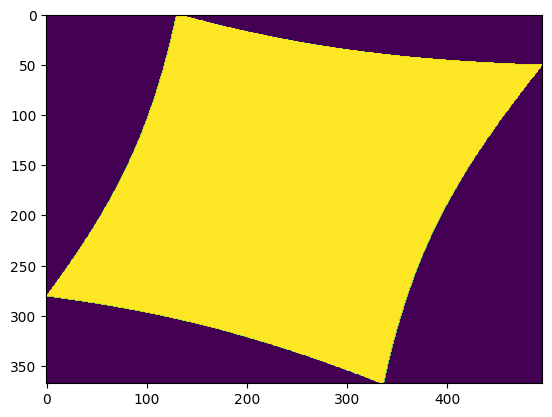

In [106]:
c = get_bounding_box(undist)
print(c)

# start_row:end_row, start_col:end_col
crop = undist[c[1]:c[3], c[0]:c[2]]
plt.imshow(crop)

c = get_bounding_box(crop)
print(c)

True

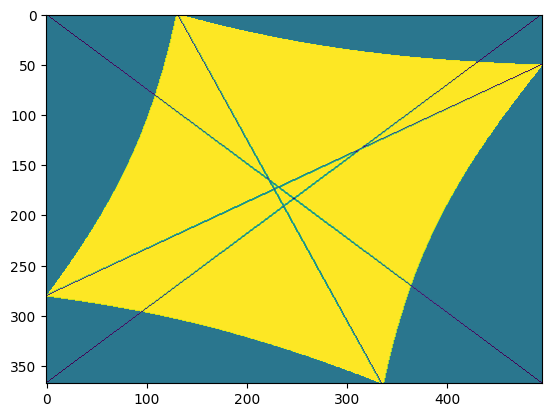

In [109]:
pix_up = np.where(crop[0] > 100)
pix_do = np.where(crop[367] > 100)

start_up = np.mean(pix_up)
start_do = np.mean(pix_do)

pix_lef = np.where(crop[:,0] > 100)
pix_rig = np.where(crop[:,494] > 100)

start_lef = np.mean(pix_lef)
start_rig = np.mean(pix_rig)

# Draw a line on the image
start_point = (int(start_up),0)  # Define the start point of the line
end_point = (int(start_do),367)  # Define the end point of the line
color = (0, 0, 0)
thickness = 1  # Define the thickness of the line

image_with_line = cv2.line(crop, start_point, end_point, color, thickness)

# Draw a line on the image
start_point = (0,int(start_lef))  # Define the start point of the line
end_point = (494,int(start_rig))  # Define the end point of the line
color = (0, 0, 0)
thickness = 1  # Define the thickness of the line

image_with_line = cv2.line(crop, start_point, end_point, color, thickness)

plt.imshow(image_with_line)
cv2.imwrite("E:/test/alignment/pol.png", image_with_line)

True

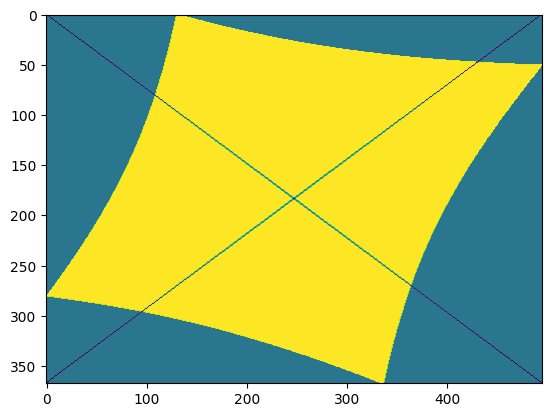

In [107]:
start_point = (0,0)
end_point = (494,367)
color = (0, 0, 0)
thickness = 1

image_with_line = cv2.line(crop, start_point, end_point, color, thickness)

start_point = (0,367)
end_point = (494,0)
color = (0, 0, 0)
thickness = 1

image_with_line = cv2.line(crop, start_point, end_point, color, thickness)

plt.imshow(image_with_line)
cv2.imwrite("E:/test/alignment/pil.png", image_with_line)

Slope: -0.466307669878006
Slope: -0.466307669878006
Slope: 1.80404794216156
Slope: 0.7535542249679565
Slope: -0.7535539865493774


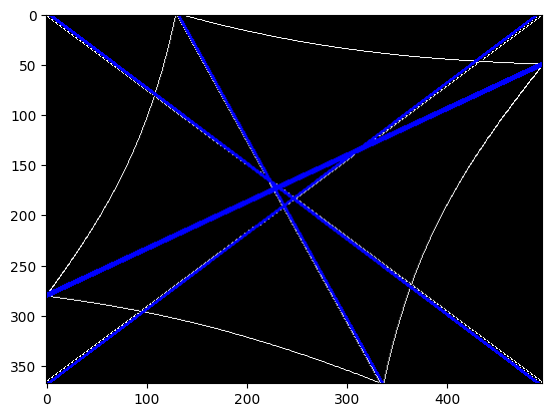

In [110]:
import cv2
import numpy as np

# Apply edge detection (if necessary)
edges = cv2.Canny(image_with_line, 50, 150, apertureSize=3)

# Apply Hough Line Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

idx = 0
slopes = []

# Calculate the slope of each line
for line in lines:
    rho, theta = line[0]
    slope = -np.cos(theta) / np.sin(theta)  # Calculate the slope using the angle information
    idx = idx + 1
    slopes.append(slope)
    print(f"Slope: {slope}")

# Display the image with the detected lines
image_with_lines = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)  # Convert the image to color for drawing
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Draw the detected lines

plt.imshow(image_with_lines)

In [111]:
print(slopes)

[-0.46630767, -0.46630767, 1.804048, 0.7535542, -0.753554]


In [112]:
# Calculate the angle between the two lines
angle_rad = np.arctan(abs((slopes[1] - slopes[4]) / (1 + slopes[1] * slopes[4])))
angle_deg = np.degrees(angle_rad)

print(f"Angle between the two lines: {angle_deg} degrees")

Angle between the two lines: 11.999997092942934 degrees


In [113]:
# Calculate the angle between the two lines
angle_rad = np.arctan(abs((slopes[2] - slopes[3]) / (1 + slopes[2] * slopes[3])))
angle_deg = np.degrees(angle_rad)

print(f"Angle between the two lines: {angle_deg} degrees")

Angle between the two lines: 23.99999606129981 degrees


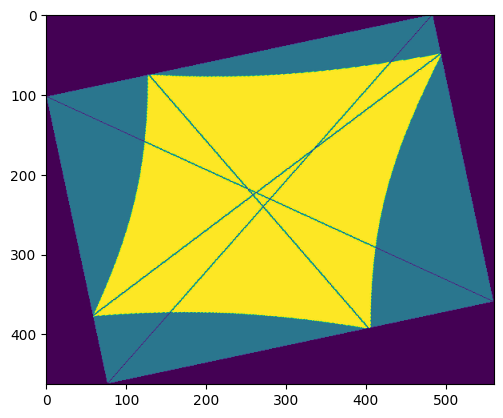

In [118]:
rot = rotate(image_with_line, 11.999999)
plt.imshow(rot)

In [ ]:
def rotateImage(img, angle, pivot):
    padX = [img.shape[1] - pivot[0], pivot[0]]
    padY = [img.shape[0] - pivot[1], pivot[1]]
    imgP = np.pad(img, [padY, padX], 'constant')
    imgR = ndimage.rotate(imgP, angle, reshape=False)
    return imgR[padY[0] : -padY[1], padX[0] : -padX[1]]

In [ ]:
undist = cv2.imread("E:/test/alignment/ir_undistorted/2464.png",0)
undist[undist==255] = 0
undist[undist!=0] = 255
undist[undist==0] = 100

plt.imshow(undist)
print(np.unique(undist))

cv2.rotate(undis)

In [ ]:
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a)

In [14]:
# Draw bounding boxes around the object
for i in range(4):
    cv2.line(undist, corner_coordinates[i], corner_coordinates[(i+1)%4], (0, 255, 0), 2)

# Show the image with bounding boxes
cv2.imshow('Image with Bounding Boxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[80, 58, 575, 426]


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt1'. Input argument doesn't provide sequence protocol
>  - Can't parse 'pt1'. Input argument doesn't provide sequence protocol


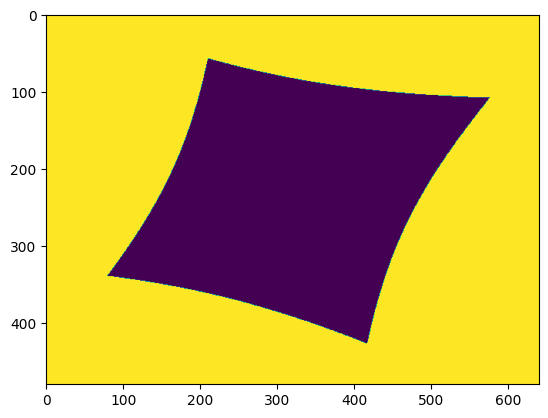

In [3]:
mask[mask!=255] = 0
plt.imshow(undist)

# lower left, lower right, upper right, upper left
z = {'corner1':['mask[i,j] == 0 and mask[i-1,j] == 255 and mask[i,j-1] == 255 and mask[i,j+1] == 255'],
     'corner2':['mask[i,j] == 0 and mask[i-1,j] == 255 and mask[i,j-1] == 255 and mask[i+1,j] == 255'],
     'corner3':['mask[i,j] == 0 and mask[i+1,j] == 255 and mask[i,j-1] == 255 and mask[i,j+1] == 255'],
     'corner4':['mask[i,j] == 0 and mask[i-1,j] == 255 and mask[i+1,j-1] == 255 and mask[i,j+1] == 255']
    }


# find the corners with boundary checks
for i in range(mask.shape[0]-1):
    for j in range(mask.shape[1]-1):
        #if z['corner1'] or z['corner2'] or z['corner3'] or z['corner4']:
        if mask[i,j] == 0 and mask[i-1,j] == 255 and mask[i,j-1] == 255 and mask[i,j+1] == 255:
            print('hello')
            mask[i,j] = 120

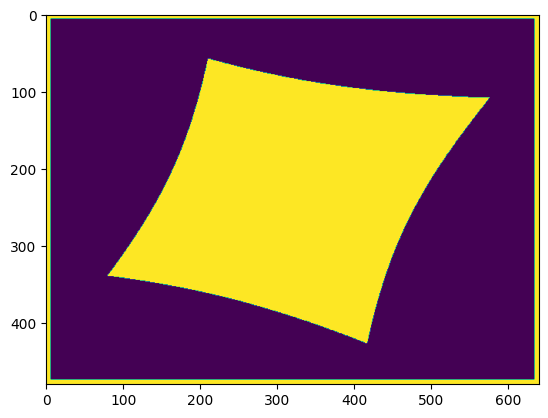

In [9]:
mask[mask==0] = 2
mask[mask==255] = 0
mask[mask==2] = 255

plt.imshow(mask)

In [6]:
# Threshold the image to isolate the black parallelogram
_, thresh = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(mask, contours, -1, (0, 255, 0), 3)

[  3 476 636]


In [ ]:
# Get the largest contour assuming it is the parallelogram
largest_contour = max(contours, key=cv2.contourArea)

# Approximate the contour to a polygon
epsilon = 0.1 * cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, epsilon, True)

# Extract the corner points
corner_points = [tuple(point[0]) for point in approx]

# Print the corner points
for i, point in enumerate(corner_points, 1):
    print(f"Corner {i}: {point}")

# Display the image with the detected parallelogram
cv2.drawContours(mask, [approx], -1, (0, 255, 0), 2)
cv2.imshow('Parallelogram', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()